# Special Orthogonal Group Example

In this notebook we will use SymDet to extract generators of the Lie algebra from SO(2) and SO(3) data sets.

In [1]:
from symdet.test_systems.so2_data import SO2
from symdet.test_systems.so3_data import SO3
from symdet.generators.generators import GeneratorExtraction

###  Generating Data

As we are looking at SO(2) and SO(3) the obvisou systems use are circles and spheres. Conveniently, we have written some example scripts to generate and look at this data. We also want to include some noise in the data to simulate a non-ideal system.

In [2]:
circle = SO2(n_points=200,
                 noise=True,
                 variance=0.05)
sphere = SO3(n_points=300,
                 noise=True,
                 variance=0.05)

We can plot this data to investigate it.

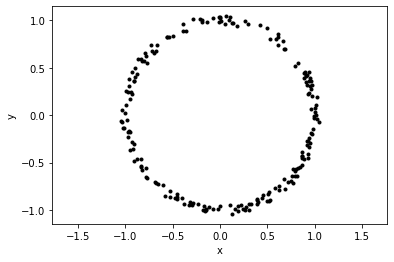

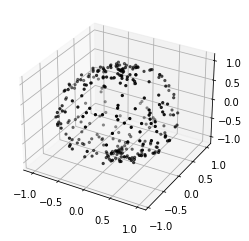

In [3]:
circle.plot_data()
sphere.plot_data()

Notice the noise around the images. This is adjustable in the class instantiation.

### Extracting Generators

Now that we have some data, we can begin extracting generators from it.

#### SO(2)

We will start by defining a generator_extractor which as a few parameters to help us fit the data.

In [4]:
generator_extractor = GeneratorExtraction(circle.data,           # clustered data
                                              delta=0.5,         # distance of points to hyperplane
                                              epsilon=0.3,       # distance between points connected by a generator
                                              candidate_runs=5)  # Number of times to run the extraction loop

We can go through this briefly with specific attention to the arguments.

* circle.data is the (x, y) data generated by the circle class
* delta is the distance between point cloud points and the hyperplane formed by your randomly chosen vectors. This should be tuned such that *enough* points are used in the fitting. If it is too big, all points will be considered to be within the generator application range and the fitting may become innacurate.
* epsilon is the allowed distance between points in the point cloud suxh that we consider them accessible by generaotr action. Again, if this is too big, the fitting will not be accurate.
* candidate_runs is the number of times the fitting process should be run. In each run, a new basis set is constructed and therefore, a new set of generators found. If you have some idea of the number of generators required describe the group you should make this values 5 or so times this number. If you have no idea, set it high. There is no downside to running the loop many times, only computational detriment.

Now we can get the generators by running the following.

Producing generator candidates: 100%|█████████████████████████████████| 5/5 [00:51<00:00, 10.28s/it]

Principle Component 1: Explained Variance: 1.0
[[-0.01044602 -0.98957071]
 [ 1.01021589  0.01022512]]


Principle Component 2: Explained Variance: 1.6375952929031957e-33
[[-0.01023248  1.01026123]
 [ 0.98956448 -0.00544955]]


Principle Component 3: Explained Variance: 2.0716986409666773e-69
[[-1.41378310e+00  2.47210228e-04]
 [-1.46971809e-02  3.16429092e-02]]


Principle Component 4: Explained Variance: 1.4521304781371925e-104
[[-0.03167837 -0.01104541]
 [ 0.00316296 -1.41381204]]




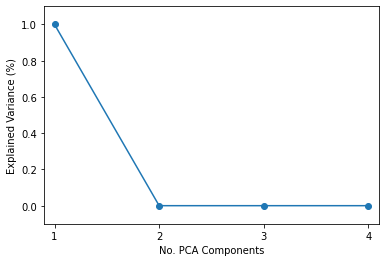

In [5]:
generators, variance_list = generator_extractor.perform_generator_extraction(pca_components=4,
                                                                                 plot=True)

First we will discuss the parameters before getting into what we are looking at in the output.

* PCA Components is the number of critical components the PCA should look for. This should be no greater than d^{2} where d is the dimension of the system. It is in fact a good idea to set it to d^{2} to make sure you do not miss anything.
* plot just asks the method to plot the results. The method will also simply return the generated data as seen in the generator, variance_list unpacking.

So now we can discuss the output. The first thing that is printed after the loading bar are the generators extracted from the data. They are accompanied by their value for explained variance which will tell you which of these are most important. In this case, we have only SO(2). We expect then that we have only a single generator as it reproduced in the example.

Producing generator candidates: 100%|█████████████████████████████████| 9/9 [01:57<00:00, 13.02s/it]

Principle Component 1: Explained Variance: 0.6616294848355883
[[-0.0224528   0.30919153  0.78470705]
 [-0.21596158  0.13172976 -0.89437981]
 [-0.83125442  0.8561025   0.01812528]]


Principle Component 2: Explained Variance: 0.23066421904244433
[[-0.03988702  0.30378289 -0.88007962]
 [-0.49372876 -0.01816433 -0.73848885]
 [ 0.92284605  0.69946445 -0.03500974]]


Principle Component 3: Explained Variance: 0.10270163308113445
[[ 0.03831138 -1.03340697 -0.12444795]
 [ 1.20411542  0.1464424  -0.42000311]
 [ 0.16415727  0.48954134  0.02783395]]


Principle Component 4: Explained Variance: 0.0038379247293105034
[[-0.34854124  1.12900343  0.46660039]
 [ 0.97036241 -0.16164081 -0.06790577]
 [ 0.58913333 -0.07904001  0.24594062]]


Principle Component 5: Explained Variance: 0.0010376409815083696
[[ 0.88733812  0.63644875 -0.85041489]
 [ 0.51410973 -0.10267017  0.33192746]
 [-0.72669087  0.36374042 -0.1973475 ]]


Principle Component 6: Explained Variance: 0.00010913928269995902
[[-0.70506316 -0

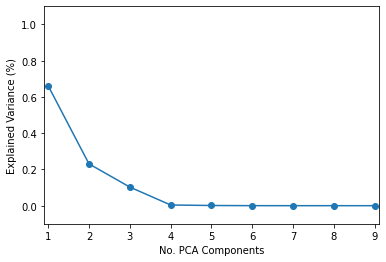

In [6]:
generator_extractor = GeneratorExtraction(sphere.data,
                                          delta=0.5,
                                          epsilon=0.3,
                                          candidate_runs=9)
generators, variance_list = generator_extractor.perform_generator_extraction(pca_components=9,
                                                                                 plot=True)